In [4]:
import numpy as np

logname = "../logs1.txt"
# logname = "../logs9.txt"


def filter_rule(s):
    return "binary_logloss" in s

def filter_time(s):
    return "Tree" in s

def extract(s):
    if filter_rule(s):
        elem = s.strip().split()
        size = int(elem[0][1:-1])
        train_loss = float(elem[3])
        valid_loss = float(elem[6])
        return "rule", (size, train_loss, valid_loss)
    elif filter_time(s):
        elem = s.strip().split()
        ts = float(elem[0][1:-1])
        return "time", (ts,)
    return None, None


ret = {}
with open(logname) as f:
    line = f.readline().strip()
    while line:
        if "Now training" in line:
            region = line.rsplit(' ', 1)[1]
        else:
            line = f.readline().strip()
            continue
        ts = []
        size = []
        train_loss = []
        valid_loss = []
        while "Training completed" not in line:
            line_type, values = extract(line)
            if line_type == "rule":
                sv, tv, vv = values
                size.append(sv)
                train_loss.append(tv)
                valid_loss.append(vv)
            elif line_type == "time":
                ts.append(values[0])
            line = f.readline().strip()
        ts = np.array(ts)
        size = np.array(size[:-1])
        train_loss = np.array(train_loss[:-1])
        valid_loss = np.array(valid_loss[:-1])
        ret[region] = {
            "ts": ts,
            "size": size,
            "train": train_loss,
            "valid": valid_loss,
        }

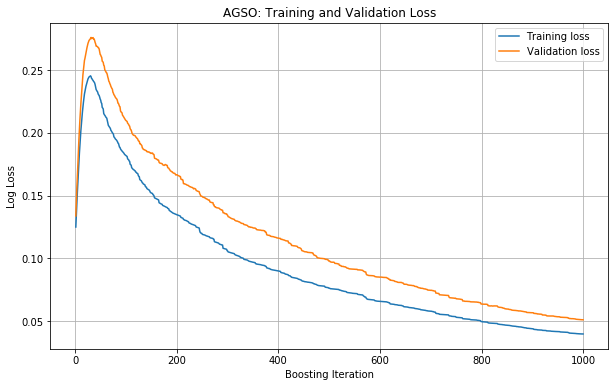

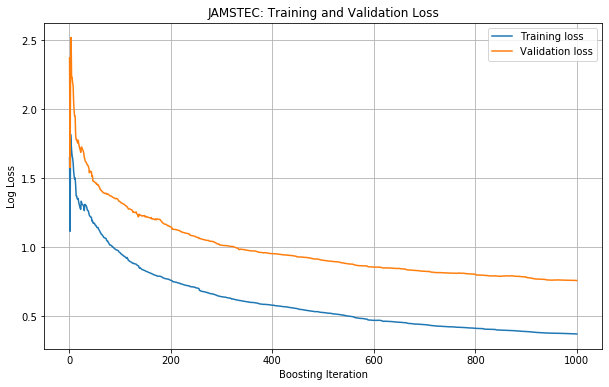

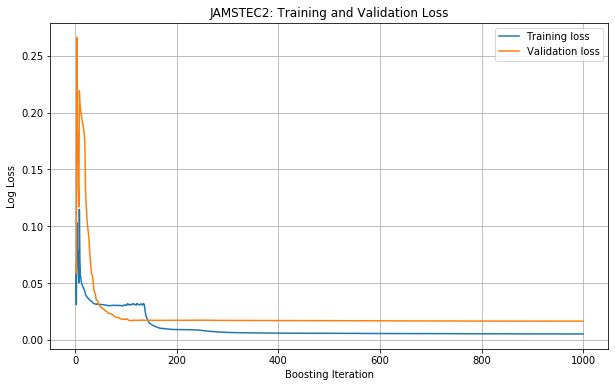

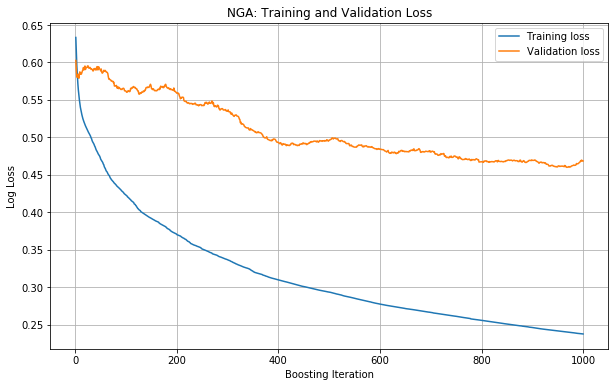

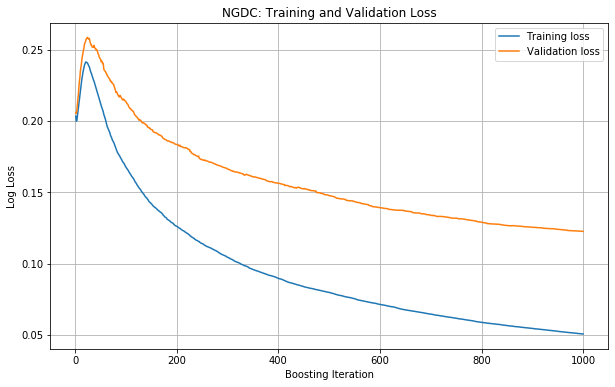

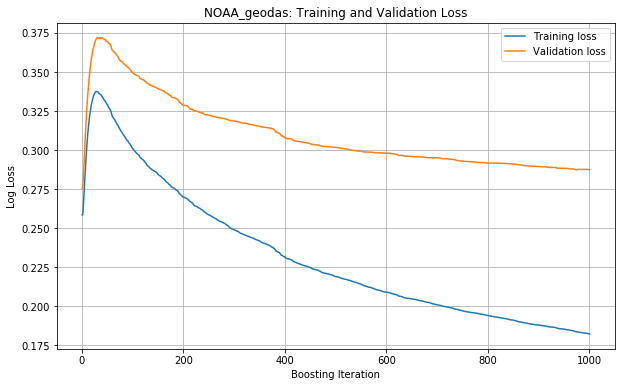

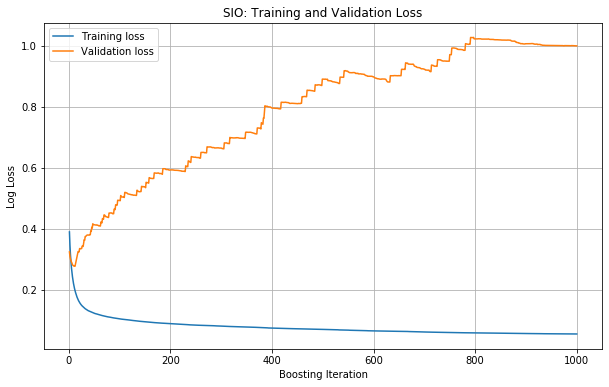

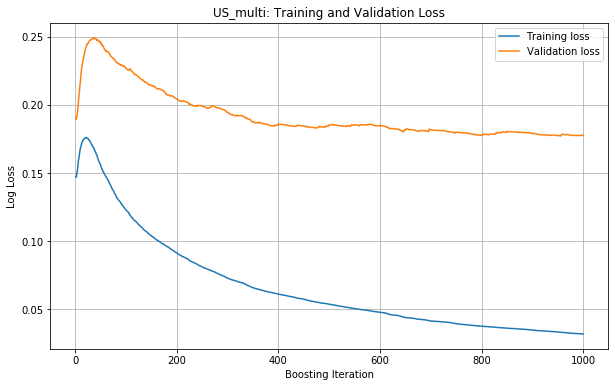

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt


for region in list(ret.keys()):
    r = ret[region]
    ts = r["ts"]
    size = r["size"]
    train_loss = r["train"]
    valid_loss = r["valid"]

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    ax.plot(size, train_loss, label="Training loss")
    ax.plot(size, valid_loss, label="Validation loss")
    ax.grid()
    ax.set_xlabel("Boosting Iteration")
    ax.set_ylabel("Log Loss")
    ax.set_title("{}: Training and Validation Loss".format(region))
    ax.legend();

    '''
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(ts, train_loss, label="Training loss")
    ax.plot(ts, valid_loss, label="Validation loss")
    ax.grid()
    ax.set_xlabel("Training Time")
    ax.set_ylabel("Log Loss")
    ax.set_title("{}: Training and Validation Loss".format(region))
    ax.legend();
    ''';

## TODO:

1. Reweight examples based on the number of the records per crew and per region
3. Run training per region
2. Classify groups based on their performance